In [ ]:
!pip install pycalverter
!pip install pmdarima

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from calverter import Calverter
from datetime import datetime
###
# jalali_to_gregorian
def gregorian_to_jalali(year, month, day):
    """
    Converts a Gregorian date to Jalali.

    :param year: the year of the Gregorian date
    :param month: the month of the Gregorian date
    :param day: the day of the Gregorian date
    :return: a tuple (year, month, day) representing the equivalent Jalali date
    """
    converter = Calverter()
    julian_date = converter.gregorian_to_jd(year, month, day)
    j_tuple = converter.jd_to_jalali(julian_date)
    return j_tuple[0], j_tuple[1], j_tuple[2]


def jalali_to_gregorian(year, month, day):
    """
    Converts a Jalali date to Gregorian.

    :param year: the year of the Jalali date
    :param month: the month of the Jalali date
    :param day: the day of the Jalali date
    :return: a tuple (year, month, day) representing the equivalent Gregorian date
    """
    converter = Calverter()
    julian_date = converter.jalali_to_jd(year, month, day)
    g_tuple = converter.jd_to_gregorian(julian_date)
    return g_tuple[0], g_tuple[1], g_tuple[2]


def jalali_to_str(year, month, day, has_time, hour=0, minute=0):
    date = '{}/{}/{}'.format(year, month, day)
    if has_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_jalali(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('/')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day


def gregorian_to_str(year, month, day, hast_time, hour=0, minute=0):
    date = '{}-{}-{}'.format(year, month, day)
    if hast_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_gregorian(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('-')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day
###

###
# jalali_to_gregorian(year, month, day)
def _convert_str_to_date(date_str):
  year = int(date_str.split('-')[0])
  month = int(date_str.split('-')[1])
  day = int(date_str.split('-')[2])
  return year, month, day

# _convert_str_to_date('1360-06-01')
def _convert_to_miladi(year, month, day):
  miladi_year, miladi_month, miladi_day =jalali_to_gregorian(year=year, month=month, day=day)
  return datetime(year=miladi_year, month=miladi_month, day=miladi_day)

def miladi(ff):  #return is like:   miladi('1360-01-01')=datetime.datetime(1981, 3, 21, 0, 0)
  return _convert_to_miladi(_convert_str_to_date(ff)[0],_convert_str_to_date(ff)[1],_convert_str_to_date(ff)[2])

# for convert '1360-06-01' to miladi date time you just need to run :miladi('1360-06-01')
###

<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-6-a645e5c52515>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':
<ipython-input-6-a645e5c52515>:69: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':


In [ ]:
# Generate time series data
import pandas as pd
import numpy as np
economic_df=pd.read_csv("drive/My Drive/Master Thesis/Imputation/bfilImputation_df.csv")
date=pd.DataFrame({'Date':economic_df['Date']})
date=date['Date'].tolist()
date=np.array([miladi(t) for t in date])
time = np.array([np.datetime64(t) for t in date])       # Convert time to datetime format



R-squared (train): 0.24520044865116786
R-squared (test): 0.2671133187095729
MSE (test): 1.18687342396216
MAE (test): 0.8941431933907356
MAPE (test): 120.70210136648917


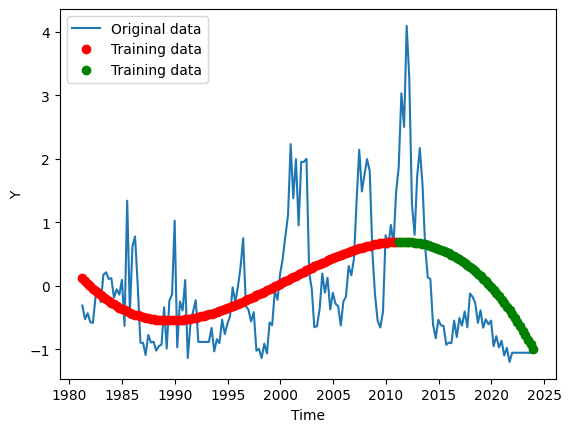

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#import the input variable; e.g. b1=eco_var
eco_var='b1'    #determine which parameter do you want to predict
economic_df=pd.read_csv("drive/My Drive/Master Thesis/Imputation/bfilImputation_df.csv")
y_data=economic_df['{}'.format(eco_var)]
y_data=np.array(y_data.tolist())


# Split the time series into train and test sets
#with shuffling(wrong)
# time_train, time_test, y_train, y_test = train_test_split(time, y_data, test_size=0.3, random_state=42)

#without shuffling(correct)
split_ratio = 0.7  # Percentage of data for training (rest is for testing)
split_index = int(len(time) * split_ratio)

time_train, time_test = time[:split_index], time[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Define the degree of the polynomial regression
degree = 3

# Perform polynomial regression on the training data
coefficients = np.polyfit(time_train.astype(int), y_train, degree)
polynomial = np.poly1d(coefficients)

# # Generate forecast data
# time_forecast = np.array(['2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01'])
# time_forecast = np.array([np.datetime64(date) for date in time_forecast])
# y_forecast = polynomial(time_forecast.astype(int))

# Calculate R-squared for training set
y_train_pred = polynomial(time_train.astype(int))
r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and MAE on test data
y_test_pred = polynomial(time_test.astype(int))
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculate R-squared for test set
r2test = r2_score(y_test, y_test_pred)
# Calculate MAPE on test data
mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print the evaluation metrics
print("R-squared (train):", r2)
print("R-squared (test):", r2test)
print("MSE (test):", mse)
print("MAE (test):", mae)
print("MAPE (test):", mape)

# Plot the original time series, training data, and forecast
plt.plot(time, y_data, label='Original data')
plt.plot(time_train, y_train_pred, 'ro', label='Training data')
plt.plot(time_test, y_test_pred, 'go', label='Training data')
# plt.plot(time_forecast, y_forecast, 'g', label='Forecast')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

#Result
Result=[y for y in y_train_pred]
for y in y_test_pred:
  Result.append(y)


In [ ]:
#Result
Result=[y for y in y_train_pred]
for y in y_test_pred:
  Result.append(y)

# print(len(Result))
Result_df=pd.DataFrame({'Result':Result})

# Result_df
Result_df.head()
Result_df.to_csv('Result_{}.csv'.format(eco_var),index=False)
files.download('Result_{}.csv'.format(eco_var))


[-0.5522128525704613, 0.6581901268853061, -0.5051215700955387, 0.2669711602476088, 0.5309655725431748, -0.09031058408142112, -0.80314549382829, -0.28361545239097374, -0.023073005418550174, -1.04534208367616, -0.11944238282444442, -0.5487286780747693, 0.7174782991356117, -0.039710556438998346, -0.561712666659469, -0.046214368235131253, 0.7153051972339544, 0.4614764398043354, -0.2545132927162008, 0.7124581787451354, 0.7084769738357961, 0.13921655086632345, -0.6565665422767086, -1.1280467829897898, -0.13533022483568757, -0.4871077797062515, 0.49609831905185775, -0.5536223404058846, -0.5268207415120516, 0.6889916269527077, -0.5350562285684397, -0.5163334898308287, 0.6306614479314163, 0.2511748402529177, 0.20616564226872391, 0.3165091494025347, -0.534385724599411, 0.5635264114387457, 0.35979155341036684, -0.8823695388332427, -1.3991809570332183, 0.1461305280722387, -0.4487602175438248, 0.5140926702342252, 0.3385642824438362, -0.1994637643799102, 0.06865777537756568, -0.5608947042014529, 0.7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>